 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [110]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [63]:
# Reading whale returns
whale_returns_csv = Path("../Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv,index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [64]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [65]:
# Drop nulls
whale_returns.dropna(inplace =True)
whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [66]:
# Reading algorithmic returns
algo_returns_csv = Path("../Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv,index_col="Date",parse_dates =True,infer_datetime_format=True)
algo_returns.head()                        

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [67]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [68]:
# Drop nulls
algo_returns.dropna(inplace =True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [69]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_csv = Path("../Resources/sp_tsx_history.csv")
sp_tsx_history = pd.read_csv(sp_tsx_history_csv,index_col="Date",parse_dates =True,infer_datetime_format=True)
sp_tsx_history.head()


,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [70]:
# Check Data Types
sp_tsx_history.dtypes

Close    object
dtype: object

In [71]:
# Fix Data Types
sp_tsx_history["Close"] =sp_tsx_history["Close"].astype(str).str.replace('$','').replace(',','',regex=True)
sp_tsx_history["Close"] =sp_tsx_history["Close"].astype(float)
sp_tsx_history

C:\Users\dymde\AppData\Local\Temp\ipykernel_26408\1962623258.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_tsx_history["Close"] =sp_tsx_history["Close"].astype(str).str.replace('$','').replace(',','',regex=True)


,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [72]:
# Calculate Daily Returns
sp_tsx_daily_returns = sp_tsx_history.pct_change()
sp_tsx_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [73]:
# Drop nulls
sp_tsx_daily_returns.dropna(inplace = True)
sp_tsx_daily_returns.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [74]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_daily_returns.rename(columns = {'Close':'S&P 60 TSX'},inplace = True)

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [75]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
joined_data = pd.concat([sp_tsx_daily_returns,algo_returns,whale_returns],axis = "columns",join = "inner")
joined_data.head()

,S&P 60 TSX,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,-0.008530,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.003371,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.001344,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.009972,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,-0.006555,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [76]:
# Calculate daily returns of all portfolios
portfolio_daily_returns=joined_data.pct_change() 
portfolio_daily_returns.dropna(inplace = True)
portfolio_daily_returns.head()

,S&P 60 TSX,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-04,-0.604848,3.422374,-3.544766,-2.762070,-1.650792,4.113646,-1.641381
2015-03-05,-1.398717,-0.888803,0.789231,0.800968,0.257544,-1.929234,0.596558
2015-03-06,-8.420220,4.190043,-3.650914,-2.968465,-1.876837,-4.601872,-2.947282
2015-03-09,-0.342692,0.098917,-1.113716,-1.073656,-2.182252,-1.688907,-0.873840
2015-03-10,1.184814,-0.744524,-10.327163,-18.625495,-2.263954,-3.067380,4.893672


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

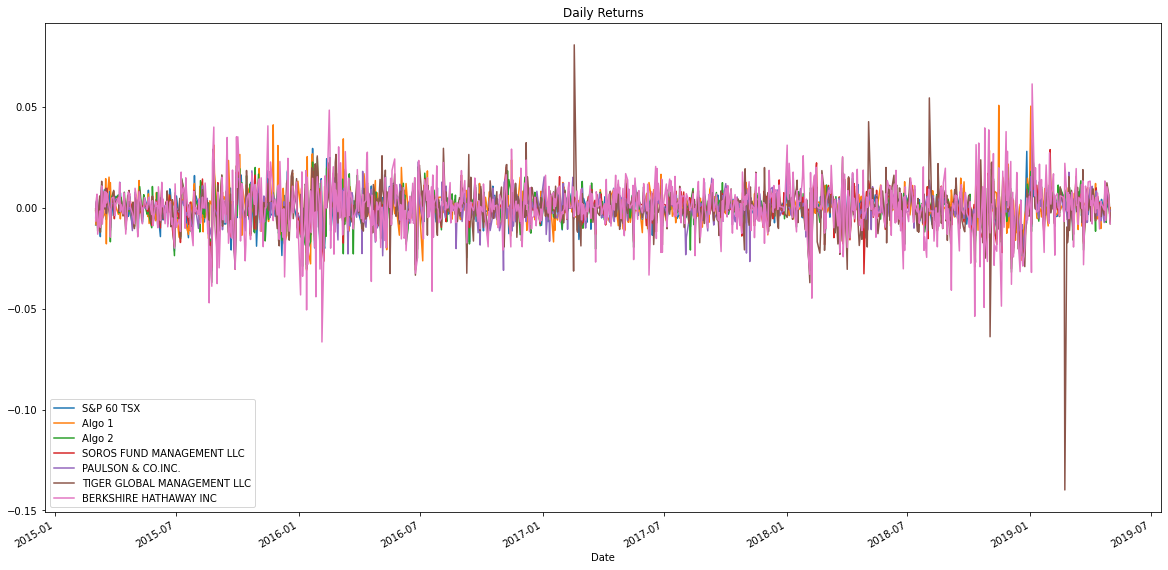

In [77]:
#Plot daily returns of all portfolios
joined_data.plot(title = "Daily Returns" , figsize=(20,10))

#### Calculate and Plot cumulative returns.

In [78]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + joined_data).cumprod()
cumulative_returns.head()


,S&P 60 TSX,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,0.991470,0.998058,0.999051,0.998734,0.995019,0.999504,0.993431
2015-03-04,0.988128,0.989486,1.001464,1.000962,0.998245,0.996972,0.997617
2015-03-05,0.989456,0.988541,1.005794,1.004981,1.002314,0.999319,1.004327
2015-03-06,0.979589,0.983641,0.994267,0.997037,0.998731,0.990844,0.991172
2015-03-09,0.973168,0.978283,0.995563,0.997617,1.002951,0.996633,0.989534


<AxesSubplot:xlabel='Date'>

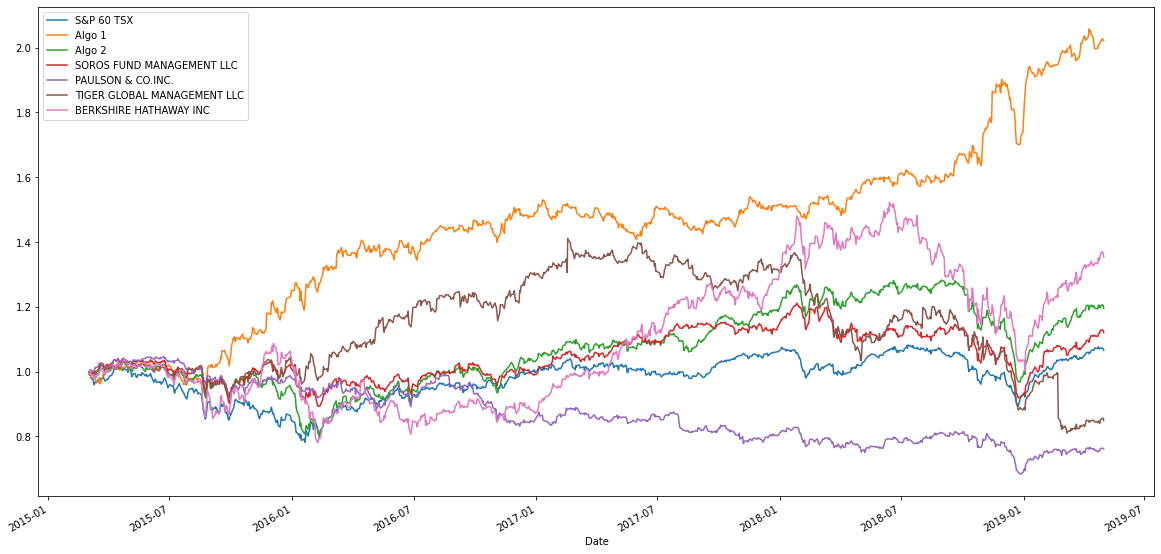

In [79]:
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

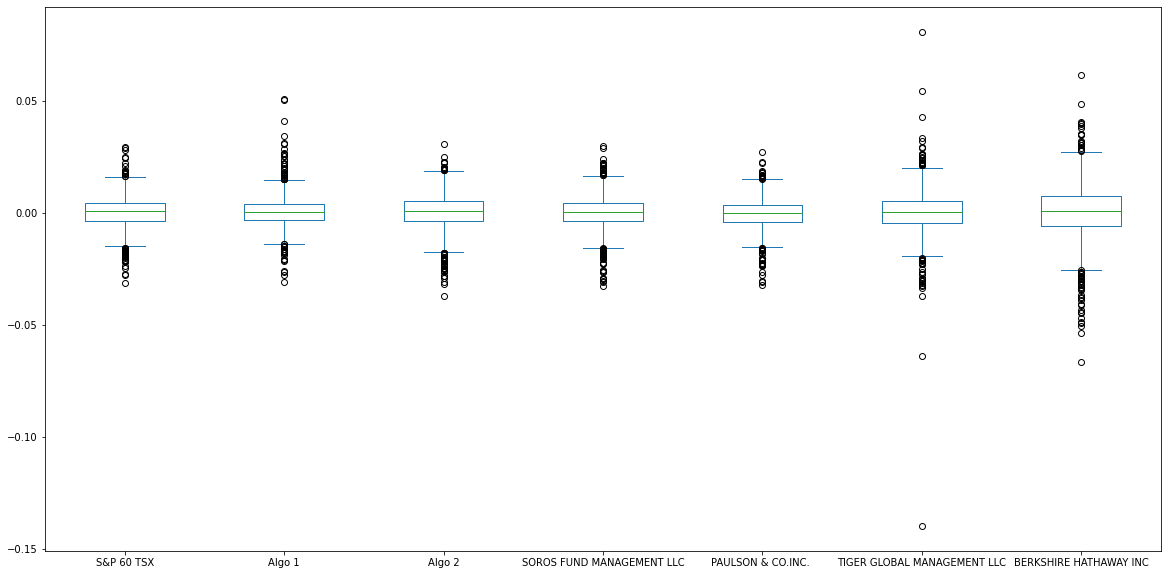

In [80]:
# Box plot to visually show risk
joined_data.plot( kind="box",figsize =(20,10))

### Calculate Standard Deviations

In [81]:
# Calculate the daily standard deviations of all portfolios
joined_data_std =joined_data.std()
joined_data_std

S&P 60 TSX                     0.007034
Algo 1                         0.007589
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [82]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_tsx_daily_returns_std = sp_tsx_daily_returns.std()
sp_tsx_daily_returns_std


S&P 60 TSX    0.006637
dtype: float64

In [83]:
# Determine which portfolios are riskier than the S&P TSX 60
riskier_std = joined_data_std [joined_data_std > joined_data_std["S&P 60 TSX"]]
riskier_std

Algo 1                         0.007589
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
dtype: float64

### Calculate the Annualized Standard Deviation

In [84]:
# Calculate the annualized standard deviation (252 trading days)
portfolios_annualized_std = joined_data.std() * np.sqrt(252)
portfolios_annualized_std 

S&P 60 TSX                     0.111664
Algo 1                         0.120470
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

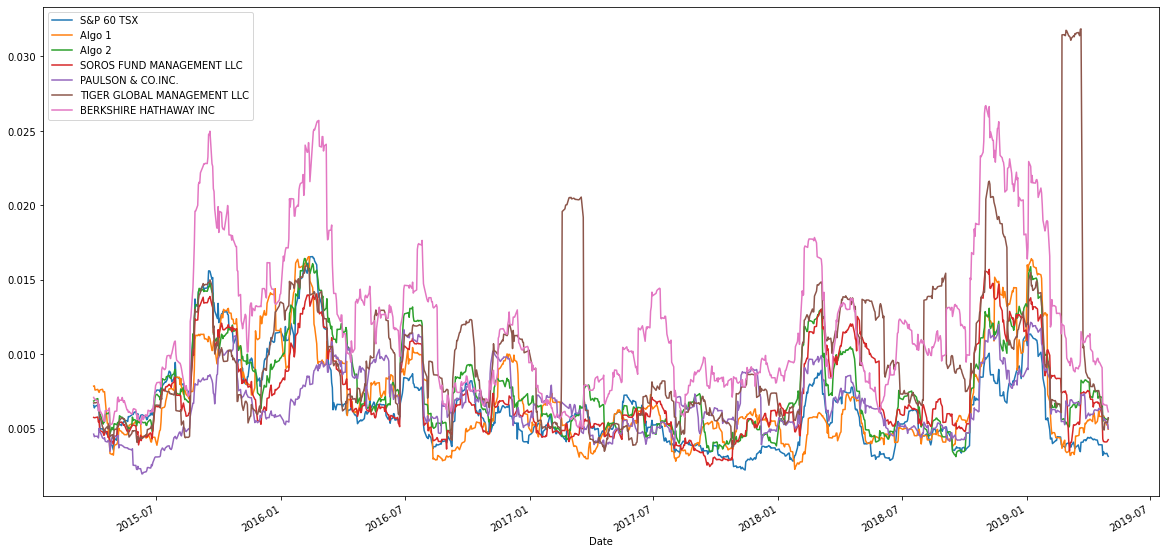

In [85]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
portfolios_rolling_21=joined_data.rolling(window = 21).std()

# Plot the rolling standard deviation
portfolios_rolling_21.plot(figsize = (20,10))

### Calculate and plot the correlation

<AxesSubplot:>

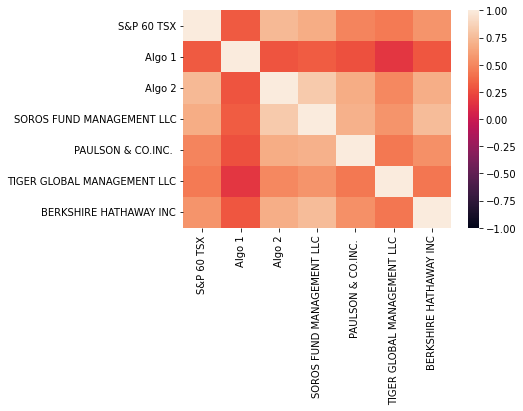

In [86]:
# Calculate the correlation
correlation_sp_tsx = joined_data.corr()
# Display de correlation matrix
sns.heatmap(correlation_sp_tsx, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [87]:
# Calculate covariance of a single portfolio
rolling_covariance = joined_data['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(joined_data['S&P 60 TSX'])
rolling_covariance.dropna(inplace = True)
rolling_covariance


Date
2015-05-28    0.000023
2015-05-29    0.000023
2015-06-01    0.000023
2015-06-02    0.000023
2015-06-03    0.000021
                ...   
2019-04-25    0.000019
2019-04-26    0.000019
2019-04-29    0.000018
2019-04-30    0.000018
2019-05-01    0.000018
Length: 970, dtype: float64

In [88]:
# Calculate variance of S&P TSX
rolling_variance = joined_data['S&P 60 TSX'].var()
rolling_variance

4.9479515915131015e-05

In [89]:
# Computing beta
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.dropna(inplace = True)
rolling_beta

Date
2015-05-28    0.470371
2015-05-29    0.462532
2015-06-01    0.470530
2015-06-02    0.467923
2015-06-03    0.422094
                ...   
2019-04-25    0.377479
2019-04-26    0.378642
2019-04-29    0.366190
2019-04-30    0.370426
2019-05-01    0.370751
Length: 970, dtype: float64

Date
2015-05-28    0.470371
2015-05-29    0.462532
2015-06-01    0.470530
2015-06-02    0.467923
2015-06-03    0.422094
                ...   
2019-04-25    0.377479
2019-04-26    0.378642
2019-04-29    0.366190
2019-04-30    0.370426
2019-05-01    0.370751
Length: 970, dtype: float64

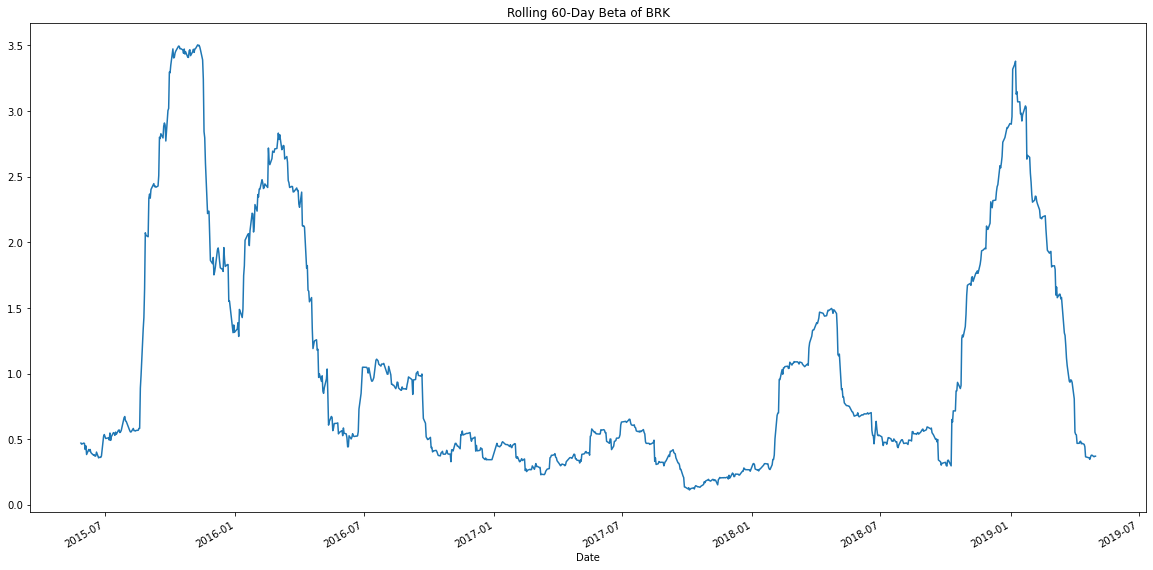

In [90]:
# Plot beta trend
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of BRK')
rolling_beta.dropna(inplace = True)
rolling_beta

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:title={'center':'Exponentially Weighted Moving Average'}, xlabel='Date'>

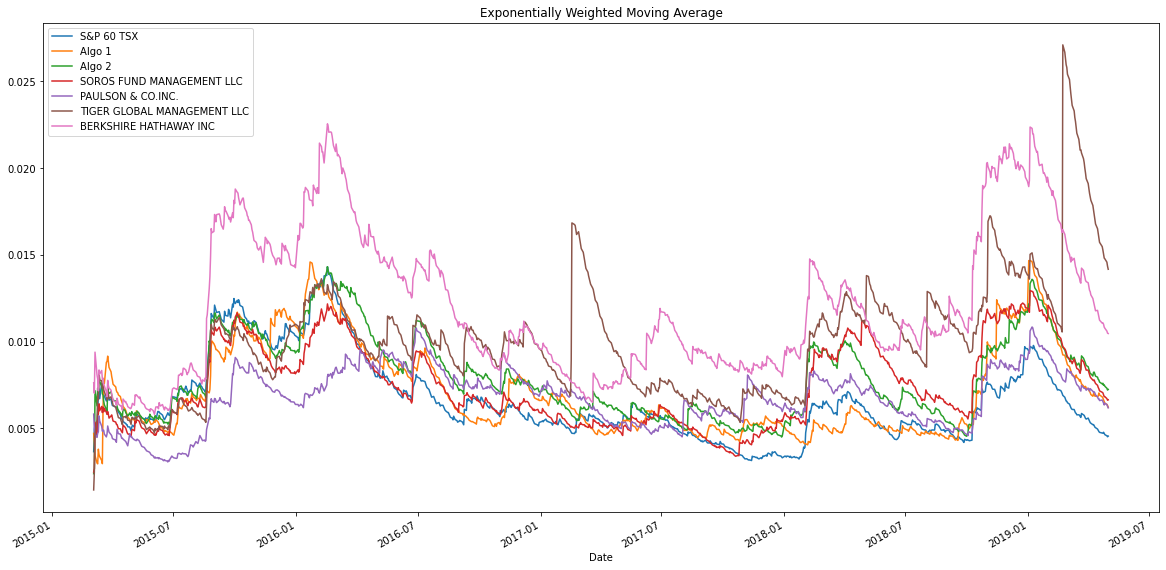

In [91]:
# Use `ewm` to calculate the rolling window
rolling_window_ewm = joined_data.ewm(halflife = 21,adjust=True, ignore_na=False).std().plot(title='Exponentially Weighted Moving Average',figsize=(20, 10))
rolling_window_ewm

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [92]:
# Annualized Sharpe Ratios
annualized_sharp_ratios = joined_data.mean()*252/(joined_data.std()*np.sqrt(252))
annualized_sharp_ratios

S&P 60 TSX                     0.195550
Algo 1                         1.491514
Algo 2                         0.396817
SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

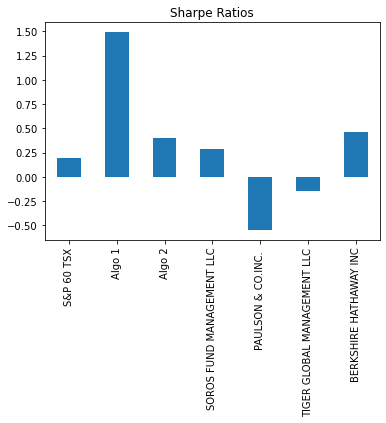

In [93]:
# Visualize the sharpe ratios as a bar plot
annualized_sharp_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Based on conducted research/analisis Algo 1 outperform S&P 60 TSX and whales portfolio.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [94]:
# Reading data from 1st stock
sq_history_csv=Path("../Resources/SQ.csv")
sq_history = pd.read_csv(sq_history_csv,index_col="Date",parse_dates = True, infer_datetime_format= True)
columns = ["Open", 'High','Low','Adj Close','Volume']
sq_history.drop(columns, inplace=True, axis=1)
sq_history.rename(columns = {"Close":'SQ'}, inplace = True)
sq_history.head()

,SQ
Date,
2015-12-21,12.24
2015-12-22,12.46
2015-12-23,12.50
2015-12-24,12.60
2015-12-28,12.83


In [95]:
# Reading data from 2nd stock
aapl_history_csv = Path("../Resources/AAPL.csv")
aapl_history = pd.read_csv(aapl_history_csv,index_col="Date",parse_dates = True, infer_datetime_format= True)
columns = ["Open", 'High','Low','Adj Close','Volume']
aapl_history.drop(columns, inplace=True, axis=1)
aapl_history.rename(columns = {"Close":"AAPL"}, inplace = True)
aapl_history.head()

,AAPL
Date,
2015-11-12,28.930000
2015-11-13,28.084999
2015-11-16,28.545000
2015-11-17,28.422501
2015-11-18,29.322500


In [96]:
# Reading data from 3rd stock
intc_history_csv=Path("../Resources/INTC.csv")
intc_history = pd.read_csv(intc_history_csv, index_col="Date",parse_dates = True, infer_datetime_format= True)
columns = ["Open", 'High','Low','Adj Close','Volume']
intc_history.drop(columns, inplace=True, axis=1)
intc_history.rename(columns = {"Close":"INTC"}, inplace = True)
intc_history.head()

,INTC
Date,
2015-12-21,34.240002
2015-12-22,34.730000
2015-12-23,35.000000
2015-12-24,34.980000
2015-12-28,34.930000


In [97]:
# Combine all stocks in a single DataFrame
my_portfolio=pd.concat([sq_history,aapl_history,intc_history],axis =1, join= "inner")
my_portfolio


,SQ,AAPL,INTC
Date,,,
2015-12-21,12.240000,26.832500,34.240002
2015-12-22,12.460000,26.807501,34.730000
2015-12-23,12.500000,27.152500,35.000000
2015-12-24,12.600000,27.007500,34.980000
2015-12-28,12.830000,26.705000,34.930000
...,...,...,...
2019-04-05,75.029999,49.250000,55.599998
2019-04-08,75.000000,50.025002,55.680000
2019-04-09,74.599998,49.875000,55.320000


In [98]:
# Reset Date index
#my_portfolio.reset_index('Date')
#my_portfolio.head()
#my_portfolio_returns.rename(columns = {0:"portfolio"}, inplace = True)

In [99]:
# Calculate daily returns
my_stocks_daily_returns = (my_portfolio - my_portfolio.shift(1)) / my_portfolio.shift(1)
my_stocks_daily_returns.dropna(inplace=True)
my_stocks_daily_returns.head()

,SQ,AAPL,INTC
Date,,,
2015-12-22,0.017974,-0.000932,0.014311
2015-12-23,0.003210,0.012869,0.007774
2015-12-24,0.008000,-0.005340,-0.000571
2015-12-28,0.018254,-0.011201,-0.001429
2015-12-29,-0.007015,0.017974,0.014601


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [100]:
# Set weights
weights = [1/3, 1/3, 1/3]
my_portfolio_weighted_returns = my_stocks_daily_returns.dot(weights)
my_portfolio_weighted_returns.dropna(inplace = True)
my_portfolio_weighted_returns.head()
my_portfolio_weighted_returns.head()




Date
2015-12-22    0.010451
2015-12-23    0.007951
2015-12-24    0.000696
2015-12-28    0.001875
2015-12-29    0.008520
dtype: float64

In [101]:
# Calculate portfolio return
#my_portfolio_returns.dropna(inplace = True)
#my_portfolio_returns.head()

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [102]:
# Join your returns DataFrame to the original returns DataFrame
portfolio_df = pd.concat((my_portfolio_weighted_returns,joined_data ), axis=1, join='inner')
portfolio_df.rename(columns = {0:"My Portfolio"}, inplace = True)
portfolio_df

,My Portfolio,S&P 60 TSX,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,,
2015-12-22,0.010451,0.003719,0.015359,0.006436,0.005509,0.003882,0.017028,0.001559
2015-12-23,0.007951,0.015444,0.017169,0.009708,0.008939,0.008066,0.018596,0.010677
2015-12-24,0.000696,0.001874,0.002325,0.001933,0.000529,-0.000480,-0.005401,-0.002535
2015-12-29,0.008520,-0.004812,0.004075,0.008142,0.008287,0.006366,0.014436,0.012741
2015-12-30,-0.007539,-0.007811,0.002880,-0.010102,-0.009674,-0.003496,-0.010775,-0.014945
...,...,...,...,...,...,...,...,...
2019-04-05,0.002605,0.005183,0.001519,0.009306,0.006880,0.006484,0.009357,0.006128
2019-04-08,0.005592,0.000679,0.003761,0.000218,0.000483,-0.000310,0.000153,0.000841
2019-04-09,-0.004932,-0.004318,0.012012,-0.011639,-0.005657,-0.004396,-0.006536,-0.002497


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [103]:
# Calculate the annualized `std`
portfolio_annualized_std = portfolio_df.std() * np.sqrt(252)
portfolio_annualized_std

My Portfolio                   0.260876
S&P 60 TSX                     0.102082
Algo 1                         0.115503
Algo 2                         0.131129
SOROS FUND MANAGEMENT LLC      0.124239
PAULSON & CO.INC.              0.114878
TIGER GLOBAL MANAGEMENT LLC    0.182424
BERKSHIRE HATHAWAY INC         0.204616
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

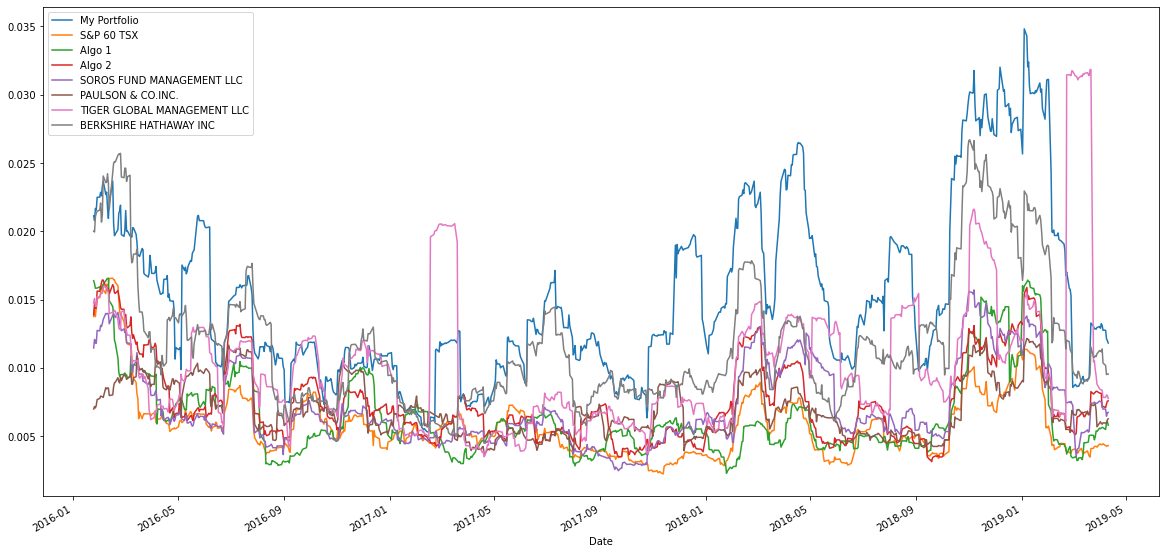

In [104]:
# Calculate rolling standard deviation
portfolio_df.rolling(window=21).std().plot(figsize = (20,10))

### Calculate and plot the correlation

In [105]:
# Calculate and plot the correlation
correlation_portfolio_df =portfolio_df.corr()
correlation_portfolio_df


,My Portfolio,S&P 60 TSX,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
My Portfolio,1.000000,0.477396,0.179877,0.637383,0.637435,0.487376,0.358704,0.681402
S&P 60 TSX,0.477396,1.000000,0.270839,0.730699,0.643775,0.474576,0.388928,0.530215
Algo 1,0.179877,0.270839,1.000000,0.266773,0.277595,0.244476,0.134546,0.268556
Algo 2,0.637383,0.730699,0.266773,1.000000,0.815376,0.670389,0.452974,0.679136
SOROS FUND MANAGEMENT LLC,0.637435,0.643775,0.277595,0.815376,1.000000,0.676271,0.513378,0.744237
PAULSON & CO.INC.,0.487376,0.474576,0.244476,0.670389,0.676271,1.000000,0.388593,0.515719
TIGER GLOBAL MANAGEMENT LLC,0.358704,0.388928,0.134546,0.452974,0.513378,0.388593,1.000000,0.375371
BERKSHIRE HATHAWAY INC,0.681402,0.530215,0.268556,0.679136,0.744237,0.515719,0.375371,1.000000


<AxesSubplot:>

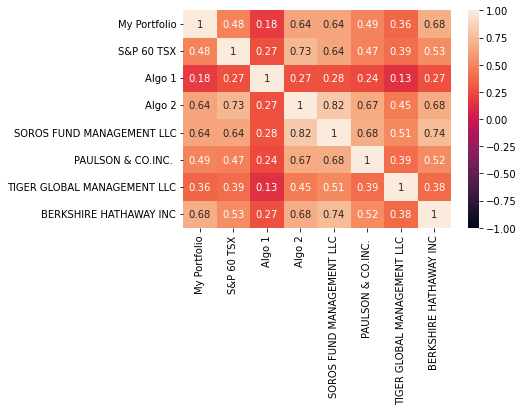

In [106]:
sns.heatmap(correlation_portfolio_df, vmin=-1, vmax=1,annot=True)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day Covariance of My Portfolio Returns vs. S&P 60 TSX Returns'}, xlabel='Date'>

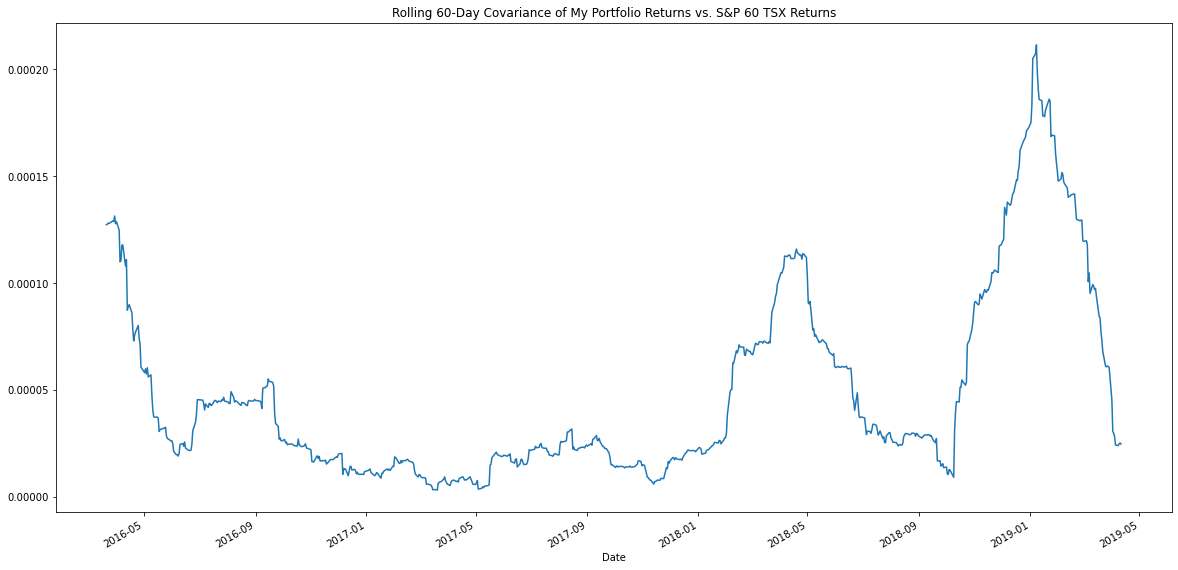

In [107]:
# Calculate and plot Beta
portfolio_rolling_covariance = portfolio_df['My Portfolio'].rolling(window=60).cov(portfolio_df['S&P 60 TSX'])
portfolio_rolling_covariance.dropna(inplace = True)
portfolio_rolling_covariance.plot(figsize=(20, 10), title='Rolling 60-Day Covariance of My Portfolio Returns vs. S&P 60 TSX Returns')


<AxesSubplot:title={'center':'Rolling 60-Day Variance of S&P 60 TSX Returns'}, xlabel='Date'>

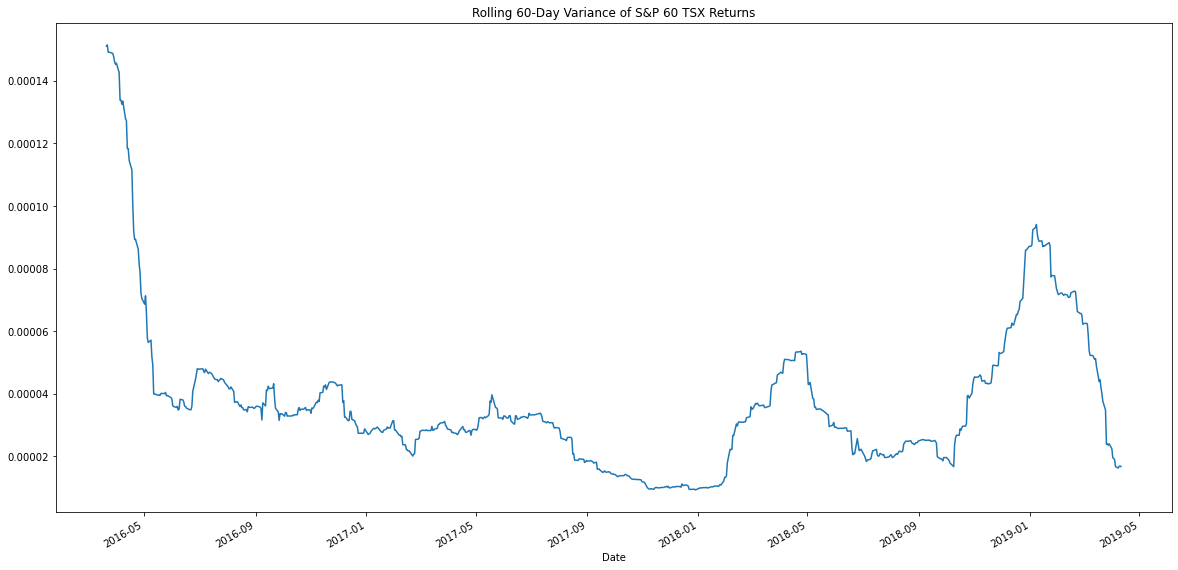

In [109]:
my_rolling_variance = portfolio_df['S&P 60 TSX'].rolling(window=60).var()
my_rolling_variance.dropna(inplace= True)
my_rolling_variance.plot(figsize=(20, 10), title='Rolling 60-Day Variance of S&P 60 TSX Returns')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [50]:
# Calculate Annualized Sharpe Ratios
portfolio_annualized_sharp_ratios = portfolio_df.mean()*252/(portfolio_df.std()*np.sqrt(252))
portfolio_annualized_sharp_ratios

My Portfolio                   1.242068
S&P 60 TSX                     0.714737
Algo 1                         1.531080
Algo 2                         0.660204
SOROS FUND MANAGEMENT LLC      0.314693
PAULSON & CO.INC.             -0.586402
TIGER GLOBAL MANAGEMENT LLC   -0.189211
BERKSHIRE HATHAWAY INC         0.475694
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

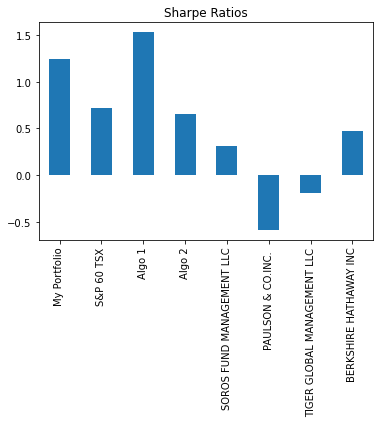

In [112]:
# Visualize the sharpe ratios as a bar plot
portfolio_annualized_sharp_ratios.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

My portfolio has the highest Annualized Standard Deviation and outperform: BERKSHIRE HATHAWAY INC;
                                                                           TIGER GLOBAL MANAGEMENT LLC;
                                                                           PAULSON & CO.INC.;
                                                                           SOROS FUND MANAGEMENT LLC;
                                                                           Algo 2 ;
                                                                           S&P 60 TSX.
But beaten by Algo 1 portfolio.
Based on correlation metrics BERKSHIRE HATHAWAY INC is highly correlated to my portfolio while Algo 1 is the furthest .